In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from Bagging import Custom_Bagging
from Boosting import Custom_Boosting
from Random_forest import Custom_RandomForest
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



In [2]:
data = pd.read_csv('your_data.csv')
data = data.iloc[:, 1:]

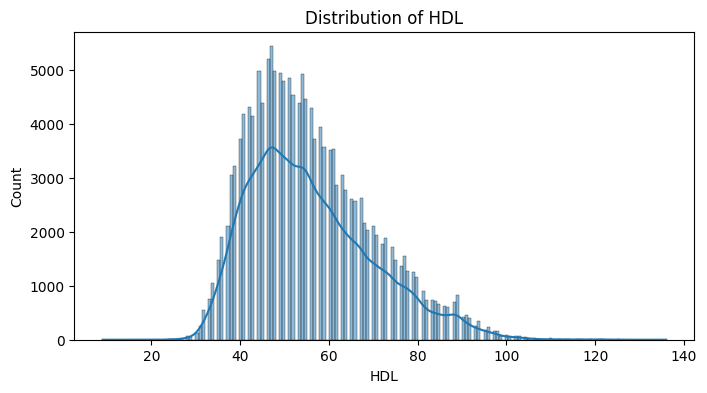

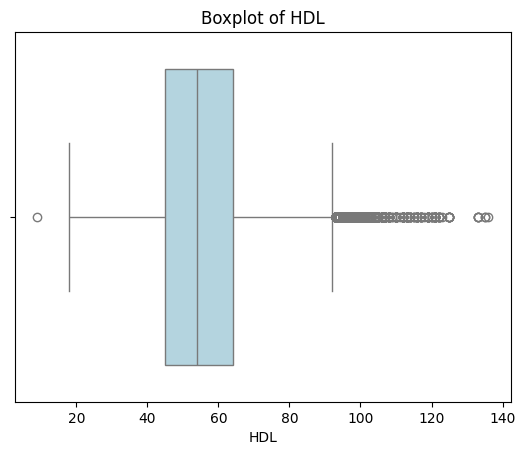

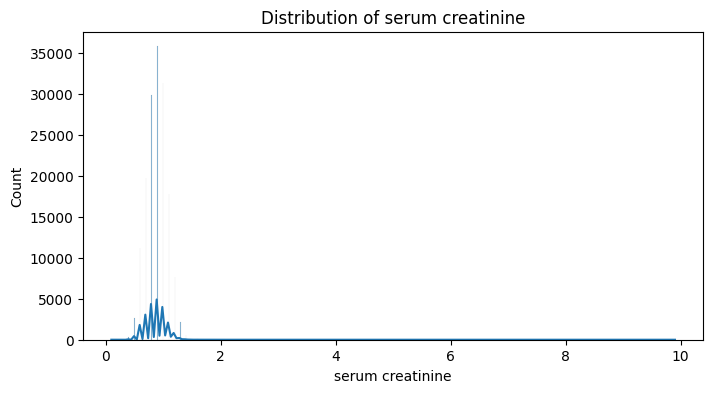

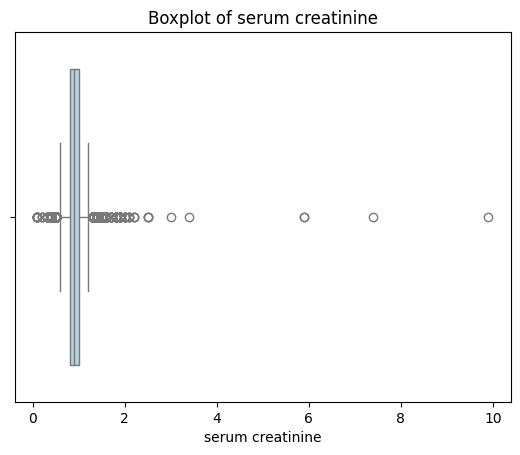

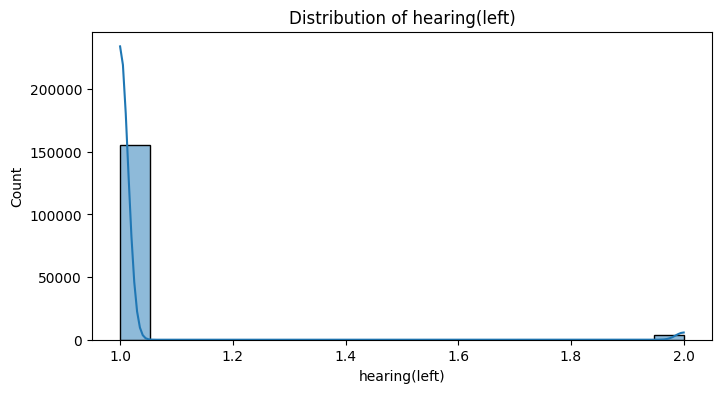

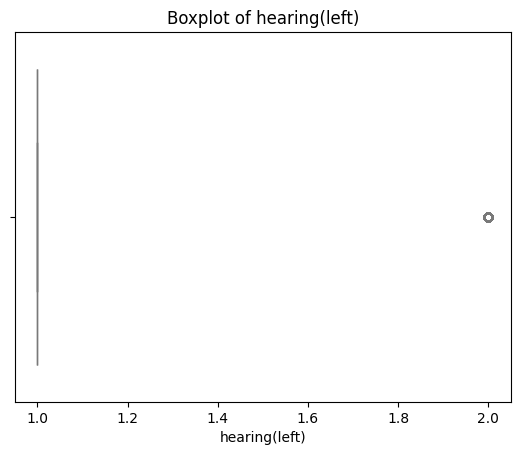

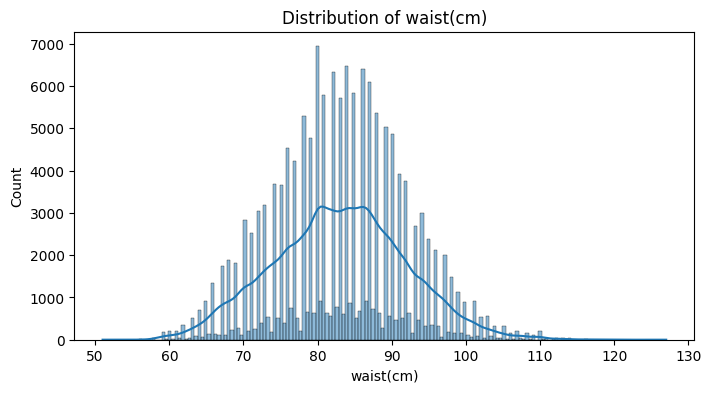

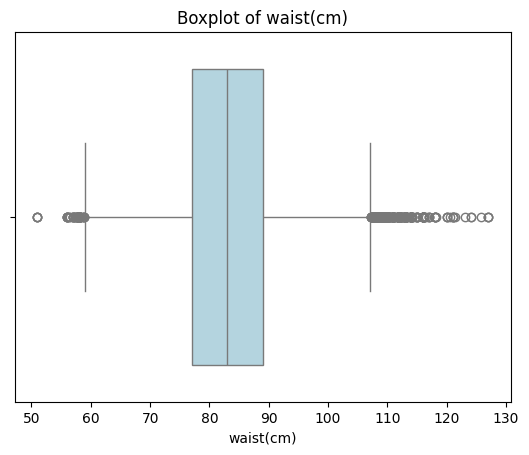

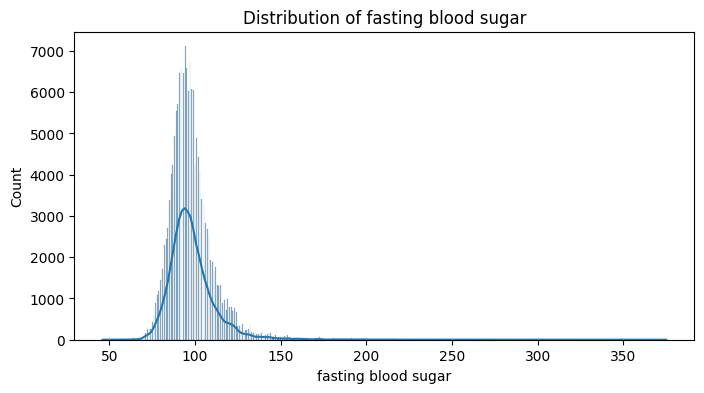

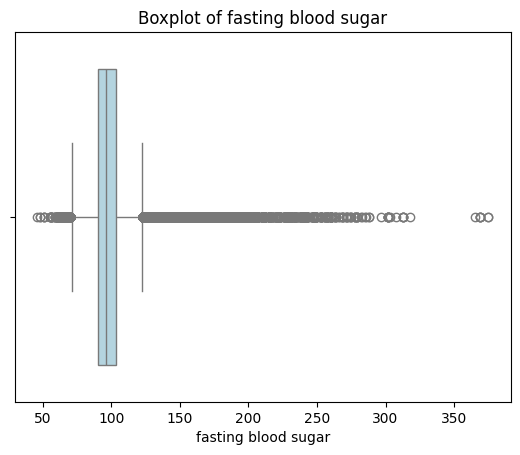

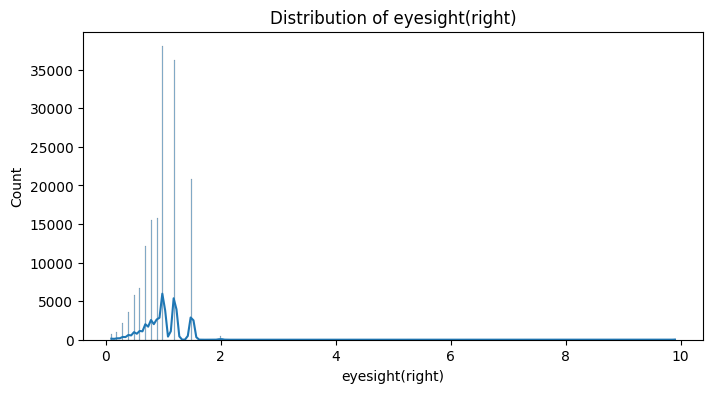

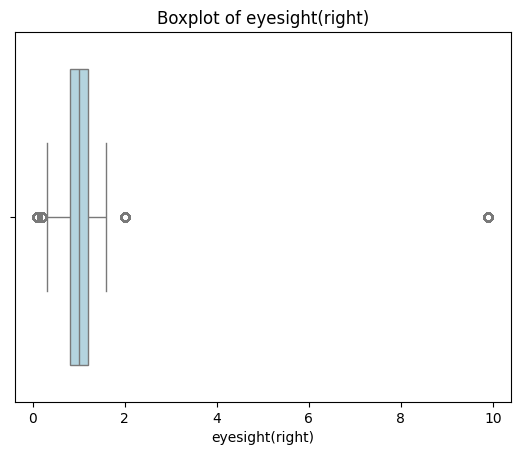

       eyesight(left)     height(cm)     hemoglobin            HDL  \
count   159256.000000  159256.000000  159256.000000  159256.000000   
mean         1.005798     165.266929      14.796965      55.852684   
std          0.402113       8.818970       1.431213      13.964141   
min          0.100000     135.000000       4.900000       9.000000   
25%          0.800000     160.000000      13.800000      45.000000   
50%          1.000000     165.000000      15.000000      54.000000   
75%          1.200000     170.000000      15.800000      64.000000   
max          9.900000     190.000000      21.000000     136.000000   

       serum creatinine  hearing(left)      waist(cm)  fasting blood sugar  \
count     159256.000000  159256.000000  159256.000000        159256.000000   
mean           0.892764       1.023974      83.001990            98.352552   
std            0.179346       0.152969       8.957937            15.329740   
min            0.100000       1.000000      51.000000    

In [3]:
column_name = ['eyesight(left)', 'height(cm)', 'hemoglobin', 'HDL', 'serum creatinine', 'hearing(left)', 'waist(cm)', 'fasting blood sugar', 'eyesight(right)']
for column in column_name:
    if column in data.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(data[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.show()

        # Boxplot
        sns.boxplot(x=data[column], color='lightblue')
        plt.title(f'Boxplot of {column}')
        plt.show()

# Descriptive statistics
print(data.describe())

Bivariate Analysis


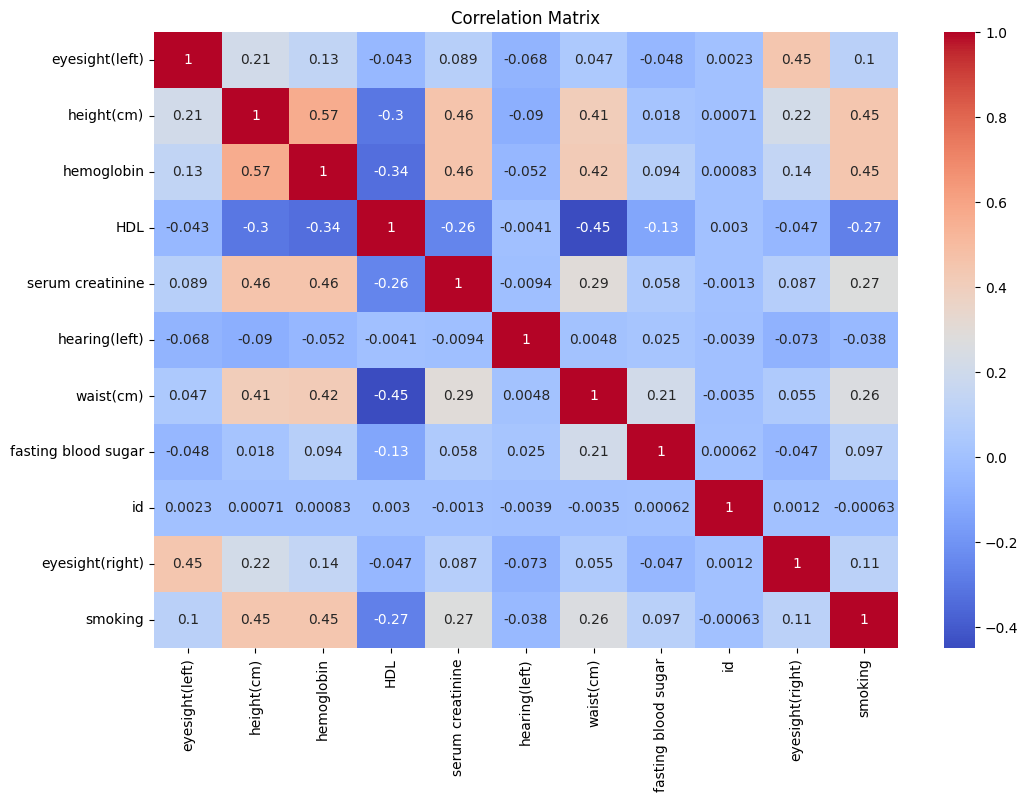

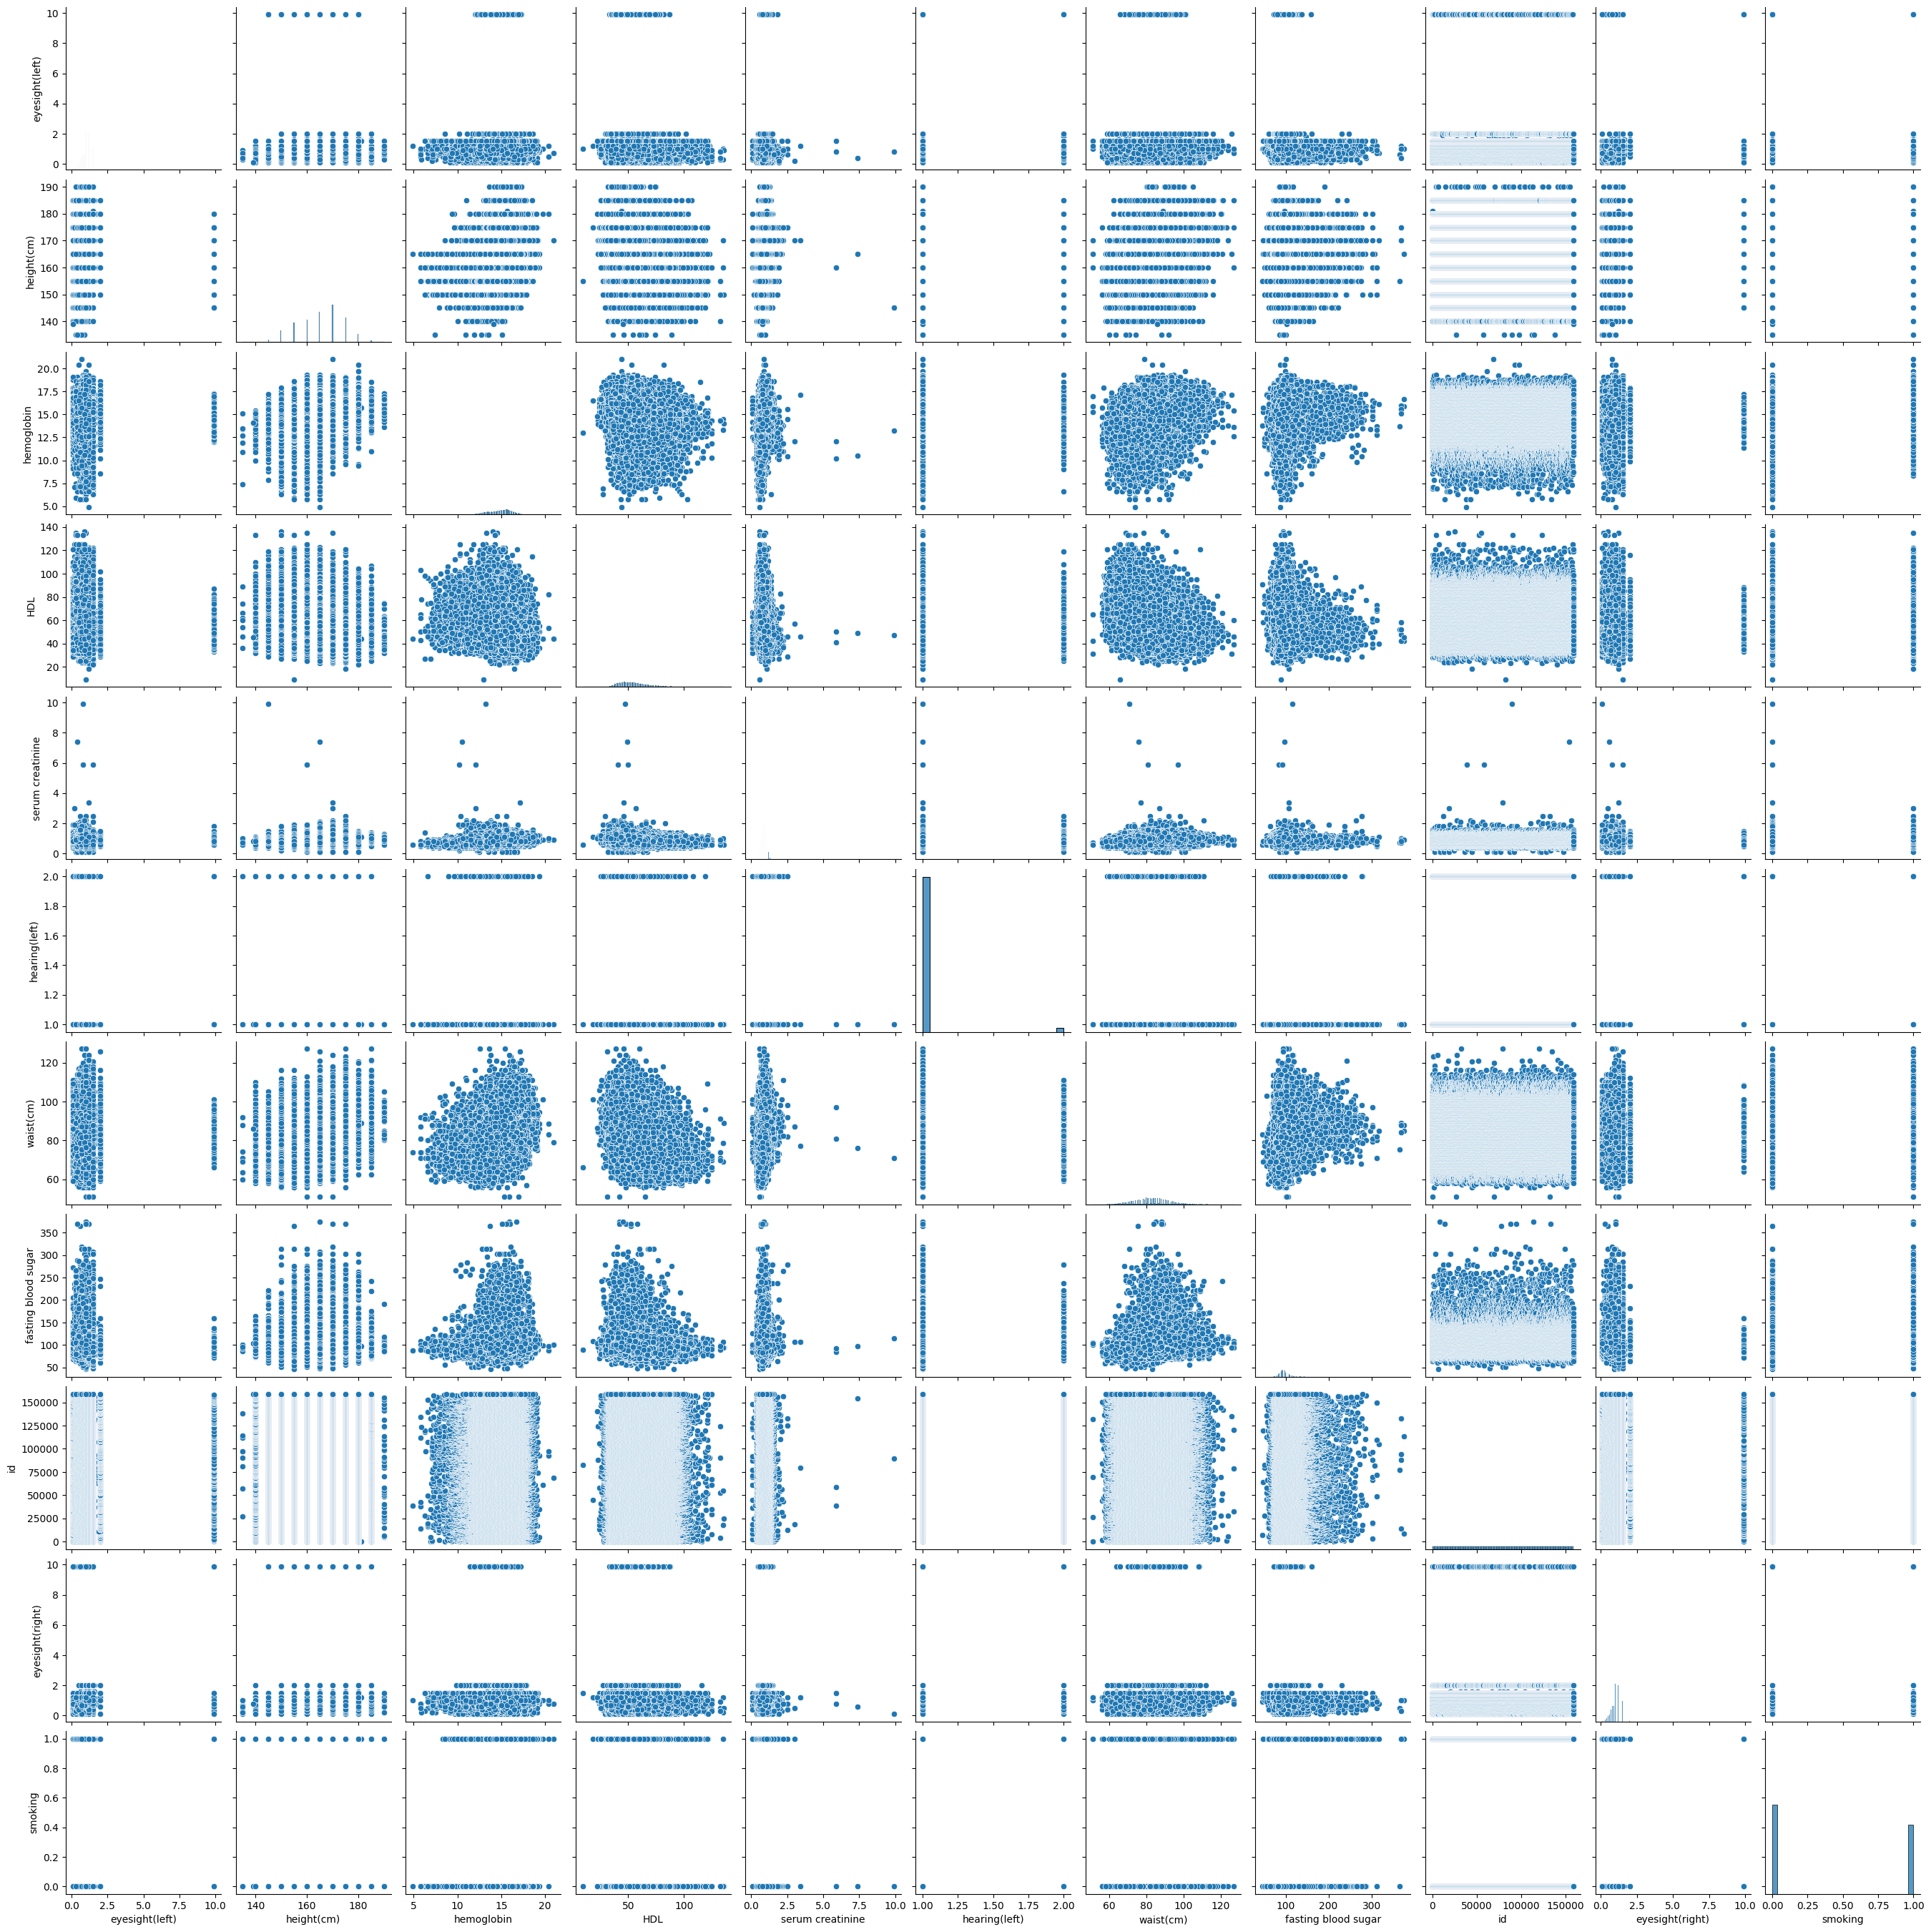

In [4]:
print("Bivariate Analysis")
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 8))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

sns.pairplot(data[numerical_columns])
plt.show()



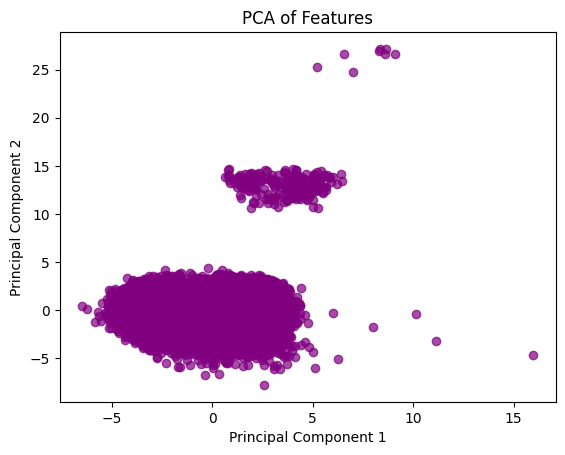

In [5]:
# PCA example for dimensionality reduction
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_columns])

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# PCA results visualization
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7, color='purple')
plt.title('PCA of Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



In [6]:
#droping unrelevant features 
data= data.drop(['eyesight(left)', 'eyesight(right)', 'hearing(left)', 'id'], axis=1)

In [7]:
# Check if there are missing values in each column
missing_values = data.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
height(cm)             0
hemoglobin             0
HDL                    0
serum creatinine       0
waist(cm)              0
fasting blood sugar    0
smoking                0
dtype: int64


In [8]:
# IQR method to detect outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
# Extract and print only the outlier values
outlier_values = data[outliers]

# Drop NaN rows to list only the outliers
outlier_values_clean = outlier_values.dropna(how='all')
print("Clean Outliers (Non-NaN rows):")
print(outlier_values_clean)

Clean Outliers (Non-NaN rows):
        height(cm)  hemoglobin  HDL  serum creatinine  waist(cm)  \
1              NaN         NaN  NaN               NaN        NaN   
5              NaN         NaN  NaN               NaN       51.0   
9              NaN         NaN  NaN               NaN        NaN   
14             NaN         NaN  NaN               1.3        NaN   
16             NaN         8.6  NaN               NaN        NaN   
...            ...         ...  ...               ...        ...   
159230         NaN         NaN  NaN               NaN        NaN   
159231         NaN         NaN  NaN               NaN        NaN   
159247         NaN         NaN  NaN               NaN        NaN   
159248         NaN         NaN  NaN               1.3        NaN   
159251         NaN         NaN  NaN               NaN        NaN   

        fasting blood sugar  smoking  
1                     147.0      NaN  
5                       NaN      NaN  
9                      64.0      Na

In [9]:
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    return ((series < (Q1 - 1.5 * IQR)) | (series > (Q3 + 1.5 * IQR))).sum()

# Count outliers for each column
outliers_count = data.apply(count_outliers)
print("Outliers Count per Column:")
print(outliers_count)

Outliers Count per Column:
height(cm)              463
hemoglobin             1493
HDL                    1932
serum creatinine       5943
waist(cm)               858
fasting blood sugar    8160
smoking                   0
dtype: int64


In [10]:
import numpy as np
# Define a function to handle outliers in each column
def winsorize(data, feature, lower_percentile=5, upper_percentile=95):

    lower_bound = np.percentile(data[feature], lower_percentile)
    upper_bound = np.percentile(data[feature], upper_percentile)
    
    # Cap the outliers
    data[feature] = np.clip(data[feature], lower_bound, upper_bound)

feautues = ['height(cm)', 'hemoglobin', 'HDL', 'serum creatinine', 'waist(cm)', 'fasting blood sugar']
for feature in feautues:
    winsorize(data, feature)

# Display the dataset after Winsorization
print("Dataset after Winsorization:")
print(data)


Dataset after Winsorization:
        height(cm)  hemoglobin  HDL  serum creatinine  waist(cm)  \
0              165        16.5   40               1.0       81.0   
1              165        16.2   57               1.1       89.0   
2              170        16.8   45               0.8       81.0   
3              180        15.9   38               1.0       98.0   
4              165        15.4   44               0.8       80.5   
...            ...         ...  ...               ...        ...   
159251         155        14.5   72               0.8       69.0   
159252         155        14.5   64               0.6       82.0   
159253         160        12.4   83               0.6       68.0   
159254         165        14.4   55               1.1       92.0   
159255         150        14.0   83               0.8       76.4   

        fasting blood sugar  smoking  
0                        94        1  
1                       122        0  
2                        81        1 

In [11]:
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    return ((series < (Q1 - 1.5 * IQR)) | (series > (Q3 + 1.5 * IQR))).sum()

# Count outliers for each column
outliers_count = data.apply(count_outliers)
print("Outliers Count per Column:")
print(outliers_count)

Outliers Count per Column:
height(cm)             0
hemoglobin             0
HDL                    0
serum creatinine       0
waist(cm)              0
fasting blood sugar    0
smoking                0
dtype: int64


In [12]:
# Z-Score Normalization
def z_score_normalize(column):
    return (column - column.mean()) / column.std()

normailzed_data_z_score = data.apply(z_score_normalize)

print("Z-Score Normalized Data:")
print(normailzed_data_z_score)


Z-Score Normalized Data:
        height(cm)  hemoglobin       HDL  serum creatinine  waist(cm)  \
0        -0.038650    1.320659 -1.207054          0.655016  -0.236825   
1        -0.038650    1.084922  0.106451          1.261260   0.731994   
2         0.551270    1.556396 -0.820729         -0.557472  -0.236825   
3         1.731109    0.849186 -1.361584          0.655016   1.821917   
4        -0.038650    0.456291 -0.897994         -0.557472  -0.297377   
...            ...         ...       ...               ...        ...   
159251   -1.218489   -0.250918  1.265427         -0.557472  -1.690055   
159252   -1.218489   -0.250918  0.647307         -1.769961  -0.115723   
159253   -0.628570   -1.901075  2.115342         -1.769961  -1.811158   
159254   -0.038650   -0.329497 -0.048079          1.261260   1.095302   
159255   -1.808409   -0.643813  2.115342         -0.557472  -0.793897   

        fasting blood sugar   smoking  
0                 -0.325019  1.134201  
1                 

In [13]:
# Min-Max Normalization
def min_max_normalize(column):
    return (column - column.min()) / (column.max() - column.min())

data_min_max = data.apply(min_max_normalize)

print("Min-Max Normalized Data:")
print(data_min_max)

Min-Max Normalized Data:
        height(cm)  hemoglobin       HDL  serum creatinine  waist(cm)  \
0         0.500000    0.931818  0.065217          0.666667   0.433333   
1         0.500000    0.863636  0.434783          0.833333   0.700000   
2         0.666667    1.000000  0.173913          0.333333   0.433333   
3         1.000000    0.795455  0.021739          0.666667   1.000000   
4         0.500000    0.681818  0.152174          0.333333   0.416667   
...            ...         ...       ...               ...        ...   
159251    0.166667    0.477273  0.760870          0.333333   0.033333   
159252    0.166667    0.477273  0.586957          0.000000   0.466667   
159253    0.333333    0.000000  1.000000          0.000000   0.000000   
159254    0.500000    0.454545  0.391304          0.833333   0.800000   
159255    0.000000    0.363636  1.000000          0.333333   0.280000   

        fasting blood sugar  smoking  
0                  0.317073      1.0  
1                  1

In [14]:
X = data.drop(columns=['smoking']) 
y = data['smoking']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [15]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif


X_new = SelectKBest(score_func=f_classif, k=5).fit_transform(X_train, y_train)
x_new_test= SelectKBest(score_func=f_classif, k=5).fit_transform(X_test, y_test)

print("Top 5 Features based on ANOVA F-test:")
print(X_new)


Top 5 Features based on ANOVA F-test:
[[165.   14.7  41.    1.1  83.2]
 [160.   14.7  77.    0.9  76. ]
 [160.   13.3  62.    0.6  68. ]
 ...
 [160.   13.8  74.    0.6  81. ]
 [170.   15.   42.    1.   97. ]
 [175.   15.2  51.    0.9  88. ]]


#five features selected by ANOVA F-test : height(cm), hemoglobin, HDL, serum creatinine, waist(cm)

In [16]:
bagging_model = Custom_Bagging(DecisionTreeClassifier, n=50)
boosting_model = Custom_Boosting(DecisionTreeClassifier, n=50)
X_new=np.array(X_new)
y_train=np.array(y_train)
X_test=np.array(x_new_test)
y_test=np.array(y_test)
y_val=np.array(y_val)
X_val=np.array(X_val)
bagging_model.fit(X_new, y_train)
boosting_model.fit(X_new, y_train)
bagging_predictions = bagging_model.predict(X_test)
boosting_predictions = boosting_model.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_predictions)
boosting_accuracy = accuracy_score(y_test, boosting_predictions)
print(f"Bagging Model Accuracy: {bagging_accuracy:.4f}")
print(f"Boosting Model Accuracy: {boosting_accuracy:.4f}")
rf_classifier = Custom_RandomForest(n_estimators=100, max_features='sqrt', random_state=42)
rf_classifier.fit(X_new, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")


Bagging Model Accuracy: 0.6837
Boosting Model Accuracy: 0.6303
Random Forest Accuracy: 0.6577
